In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [154]:
df_train = pd.read_csv('train/X_train.txt', delim_whitespace=True, header=None)
df_test = pd.read_csv('test/X_test.txt', delim_whitespace=True, header=None)

combine = pd.concat([df_train, df_test])

y_train = np.array(pd.read_csv('train/y_train.txt', header=None)).ravel()
y_test = np.array(pd.read_csv('test/y_test.txt', header=None)).ravel()
df_train.shape, df_test.shape, combine.shape

stdScaler = StandardScaler()
X = stdScaler.fit_transform(combine.values)
X_train = stdScaler.fit_transform(df_train.values)
X_test = stdScaler.fit_transform(df_test.values)

# Visualizing Output Labels

[0, 2, 4, 6, 8, 10]

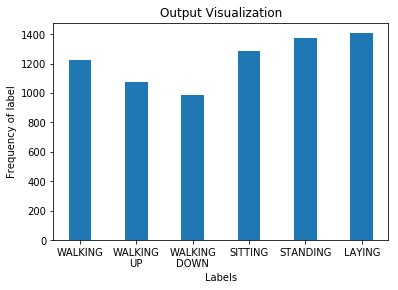

In [171]:
labels = ['WALKING', 'WALKING\nUP', 'WALKING\nDOWN', 'SITTING', 'STANDING', 'LAYING']
# x_labels = np.arange(len(labels))
x_labels = [i for i in range(0, 11, 2)]
display(x_labels)
freq = [0 for i in range(len(labels))]
for i in range(len(labels)) :
    freq[i] = sum(y_train == i+1)
    
plt.bar(x_labels, freq)
plt.xticks(x_labels, labels)
plt.xlabel("Labels")
plt.ylabel("Frequency of label")
plt.title("Output Visualization")

plt.show()

In [150]:
sum(y_train == 2)

1073

# Applying PCA

Since, the number of attributes is very large, we are applying **PCA** to reduce the dimensions of feature vector.

In [197]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.85, random_state=42) 
pca = pca.fit(X_train)
Xtrain_pca = pca.transform(X_train)
Xtest_pca = pca.transform(X_test)

Xtrain_pca.shape

(7352, 40)

We can see that the first principal component accounts for 0.5 variance, (first+second) principal components accounts for 0.57 variance and this gradually decreases further.

array([0.50781172, 0.57361853, 0.60168289, 0.62672242, 0.64560527,
       0.66284534, 0.67655545, 0.68854623, 0.69850482, 0.70815569,
       0.7167562 , 0.72475901, 0.73239898, 0.73885227, 0.74517551,
       0.75117273, 0.75704023, 0.76279431, 0.76847352, 0.77374648,
       0.77875011, 0.78363419, 0.78841625, 0.79310188, 0.79759477,
       0.80180504, 0.80598483, 0.81004053, 0.81392577, 0.81779595,
       0.82145554, 0.82500108, 0.8284805 , 0.83185237, 0.83514914,
       0.83843129, 0.84163659, 0.84459274, 0.84745996, 0.85031071])

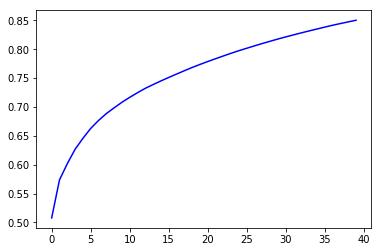

In [198]:
pca_csum = pca.explained_variance_ratio_.cumsum()
display(pca_csum)
pca_csum_list = []
for i in range(len(pca_csum)) :
    pca_csum_list.append(pca_csum[i])
plt.plot(pca_csum_list, 'b')
plt.show()

In [199]:
stdScaler = StandardScaler()
X_train = stdScaler.fit_transform(Xtrain_pca)
X_test = stdScaler.transform(Xtest_pca)
# X_train2.shape, X_test2.shape

In [200]:
d=[0.001, 0.003, 0.006, 0.01,0.03,0.06,0.1,0.3,0.6, 1]

# Logistic Regression 

In [201]:
from sklearn.linear_model import LogisticRegression

### Using Liblinear as *solver*

For multiclass problems, **Liblinear** uses one-versus-rest schemes.

0.001 0.8962187159956474
0.001 0.8927723108245673
-------------------------
0.003 0.9001632208922742
0.003 0.8937902952154734
-------------------------
0.006 0.904651795429815
0.006 0.8971835765184933
-------------------------
0.01 0.9084602829162133
0.01 0.9005768578215134
-------------------------
0.03 0.9163492927094669
0.03 0.9070240922972514
-------------------------
0.06 0.9217899891186072
0.06 0.9087207329487614
-------------------------
0.1 0.9243743199129488
0.1 0.9121140142517815
-------------------------
0.3 0.9292709466811752
0.3 0.9165252799457075
-------------------------
0.6 0.9317192600652884
0.6 0.9158466236851035
-------------------------
1 0.9333514689880305
1 0.9182219205972175
-------------------------
Optimal C =  1
Training score by Logistic Regression (liblinear) :  0.9333514689880305
Test score by Logistic Regression (liblinear) :  0.9182219205972175


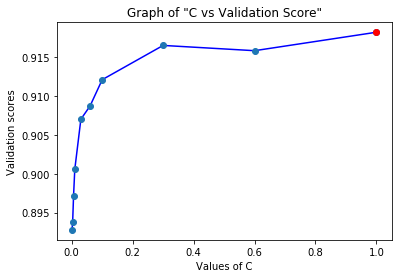

In [202]:
max_train = 0
max_test = 0
optimalC = d[0]
c_list = []
for i in d:
    
    clf = LogisticRegression(C=i, penalty='l2', random_state=42)
    clf.fit(X_train, y_train)
    score_train = clf.score(X_train, y_train)
    score_test = clf.score(X_test, y_test)
    
    print(i, score_train)
    print(i, score_test)
    print('-'*25)
    
    c_list.append(score_test)
    if(score_test > max_test) :
        max_test = score_test
        max_train = score_train
        optimalC = i

print("Optimal C = ", optimalC)
print("Training score by Logistic Regression (liblinear) : ", max_train)
print("Test score by Logistic Regression (liblinear) : ", max_test)
plt.plot(d, c_list, 'b', d, c_list, 'o')
plt.plot(d[d.index(optimalC)], c_list[d.index(optimalC)], 'ro')
plt.xlabel("Values of C")
plt.ylabel("Validation scores")
plt.title("Graph of \"C vs Validation Score\"")
plt.show()

 # SVM 

In [ ]:
# from sklearn.svm import SVC

max_train = 0
max_test = 0
svc_list = [1] + [i for i in range(5, 51, 5)]
optimalC = svc_list[0]
for i in svc_list:
    
    clf = SVC(C=i, kernel='rbf', random_state=42)
    clf.fit(X_train, y_train)
    score_train = clf.score(X_train, y_train)
    score_test = clf.score(X_test, y_test)
    
#     print(i, score_train)
#     print(i, score_test)
    
#     print('-'*25)
    if(score_test > max_test) :
        max_test = score_test
        max_train = score_train
        optimalC = i

print("Optimal C = ", optimalC)
print("Training score by SVM : ", max_train)
print("Test score by SVM : ", max_test)

In [ ]:
from sklearn.svm import SVC

max_train = 0
max_test = 0
svc_list = [1] + [i for i in range(5, 51, 5)]
optimalC = svc_list
for i in svc_list:
    
    clf = SVC(C=i, kernel='linear', random_state=42)
    clf.fit(Xtrain_pca, y_train)
    score_train = clf.score(Xtrain_pca, y_train)
    score_test = clf.score(Xtest_pca, y_test)
    
#     print(i, score_train)
#     print(i, score_test)
    
#     print('-'*25)
    if(score_test > max_test) :
        max_test = score_test
        max_train = score_train
        optimalC = i

print("Optimal C = ", optimalC)
print("Training Error by SVM : ", max_train)
print("Test Error by SVM : ", max_test)

In [158]:
from sklearn.ensemble import RandomForestClassifier
max_train = 0
max_test = 0
optimalDepth = 7
optimalEstimator = 10
for depth in [7, 8, 9] :
    for estimator in range(10, 51, 5) :
        model_rfc = RandomForestClassifier(n_estimators=estimator, max_depth=depth)
        model_rfc.fit(X_train, y_train)
        score_train = model_rfc.score(X_train, y_train)
        score_test = model_rfc.score(X_test, y_test)
#         print("Training Score for %d and %d ", depth, estimator, " : ", train_score)
#         print("Validation Score for %d and %d ", depth, estimator," : ", val_score)
        if(max_test < score_test) :
            max_test = score_test
            max_train = score_train
            optimalDepth = depth
            optimalEstimator = estimator
            print("depth, estimator = ", depth, estimator)
            
print("Optimal Depth = ", optimalDepth)
print("Optimal Number of Estimatos = ", optimalEstimator)
print("Training Score by Random Forest : ", max_train)
print("Test Score by Random Forest : ", max_test)

depth, estimator =  7 10
depth, estimator =  7 20
depth, estimator =  7 50
depth, estimator =  8 25
depth, estimator =  9 20
depth, estimator =  9 30
depth, estimator =  9 45
Optimal Depth =  9
Optimal Number of Estimatos =  45
Training Score by Random Forest :  0.9929270946681176
Test Score by Random Forest :  0.9222938581608415
